In [2]:
df = pd.read_csv('gold_monthly.csv')

In [3]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.shape

(847, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


## DATA MANUPULATION ON DATES

In [7]:
print(f'Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}')

Date range of gold prices available from - 1950-01 to 2020-07


In [8]:
date = pd.date_range (start = '1/1/1950', end = '8/1/2020',freq = 'M')

In [9]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [10]:
df['Month'] = date

In [11]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [12]:
df.drop('Date',axis = 1, inplace =True)
df = df.set_index('Month')

In [13]:
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


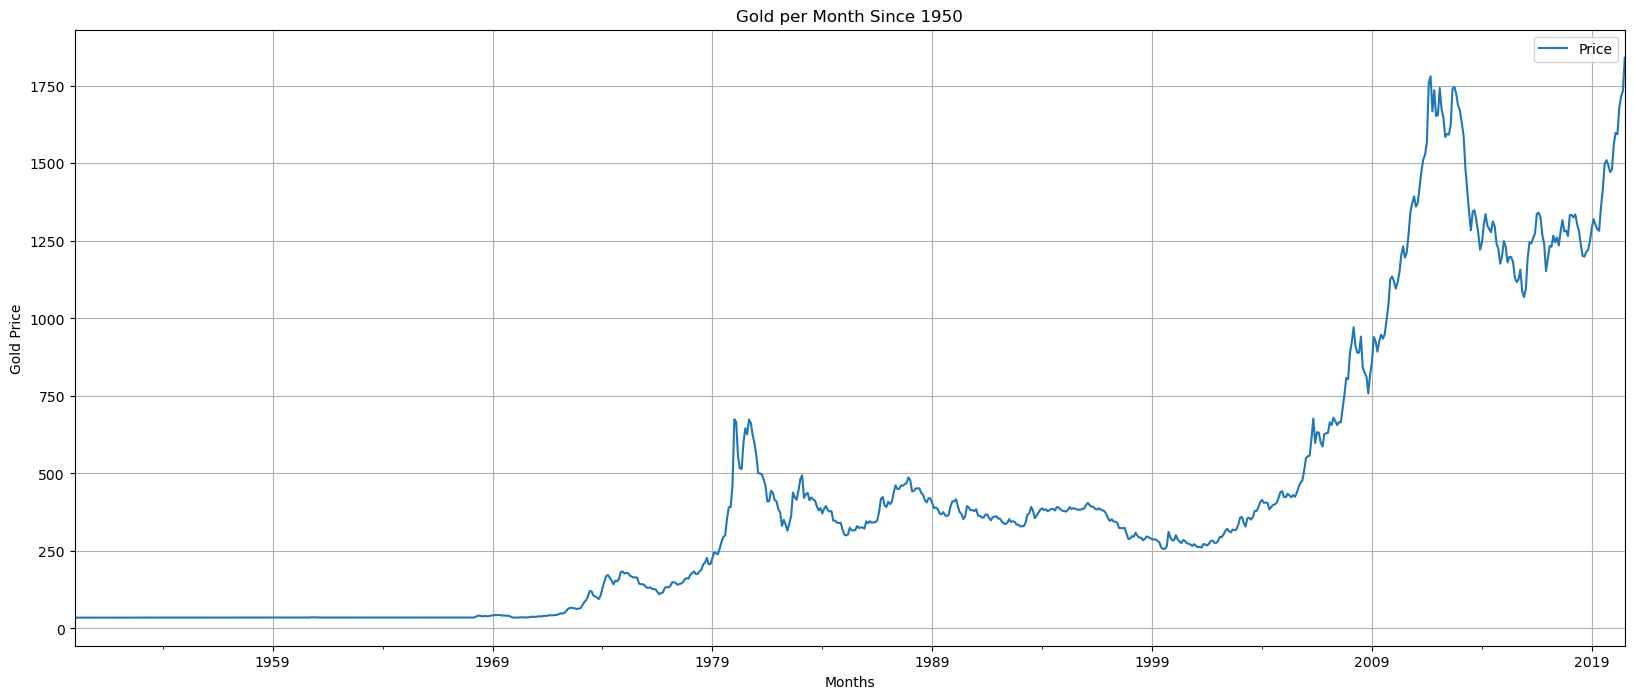

In [14]:
df.plot(figsize=(20,8))
plt.title('Gold per Month Since 1950')
plt.xlabel('Months')
plt.ylabel('Gold Price')
plt.grid();

In [15]:
round(df.describe(),3).transpose()

,count,mean,std,min,25%,50%,75%,max
Price,847.0,416.557,453.665,34.49,35.19,319.622,447.029,1840.807


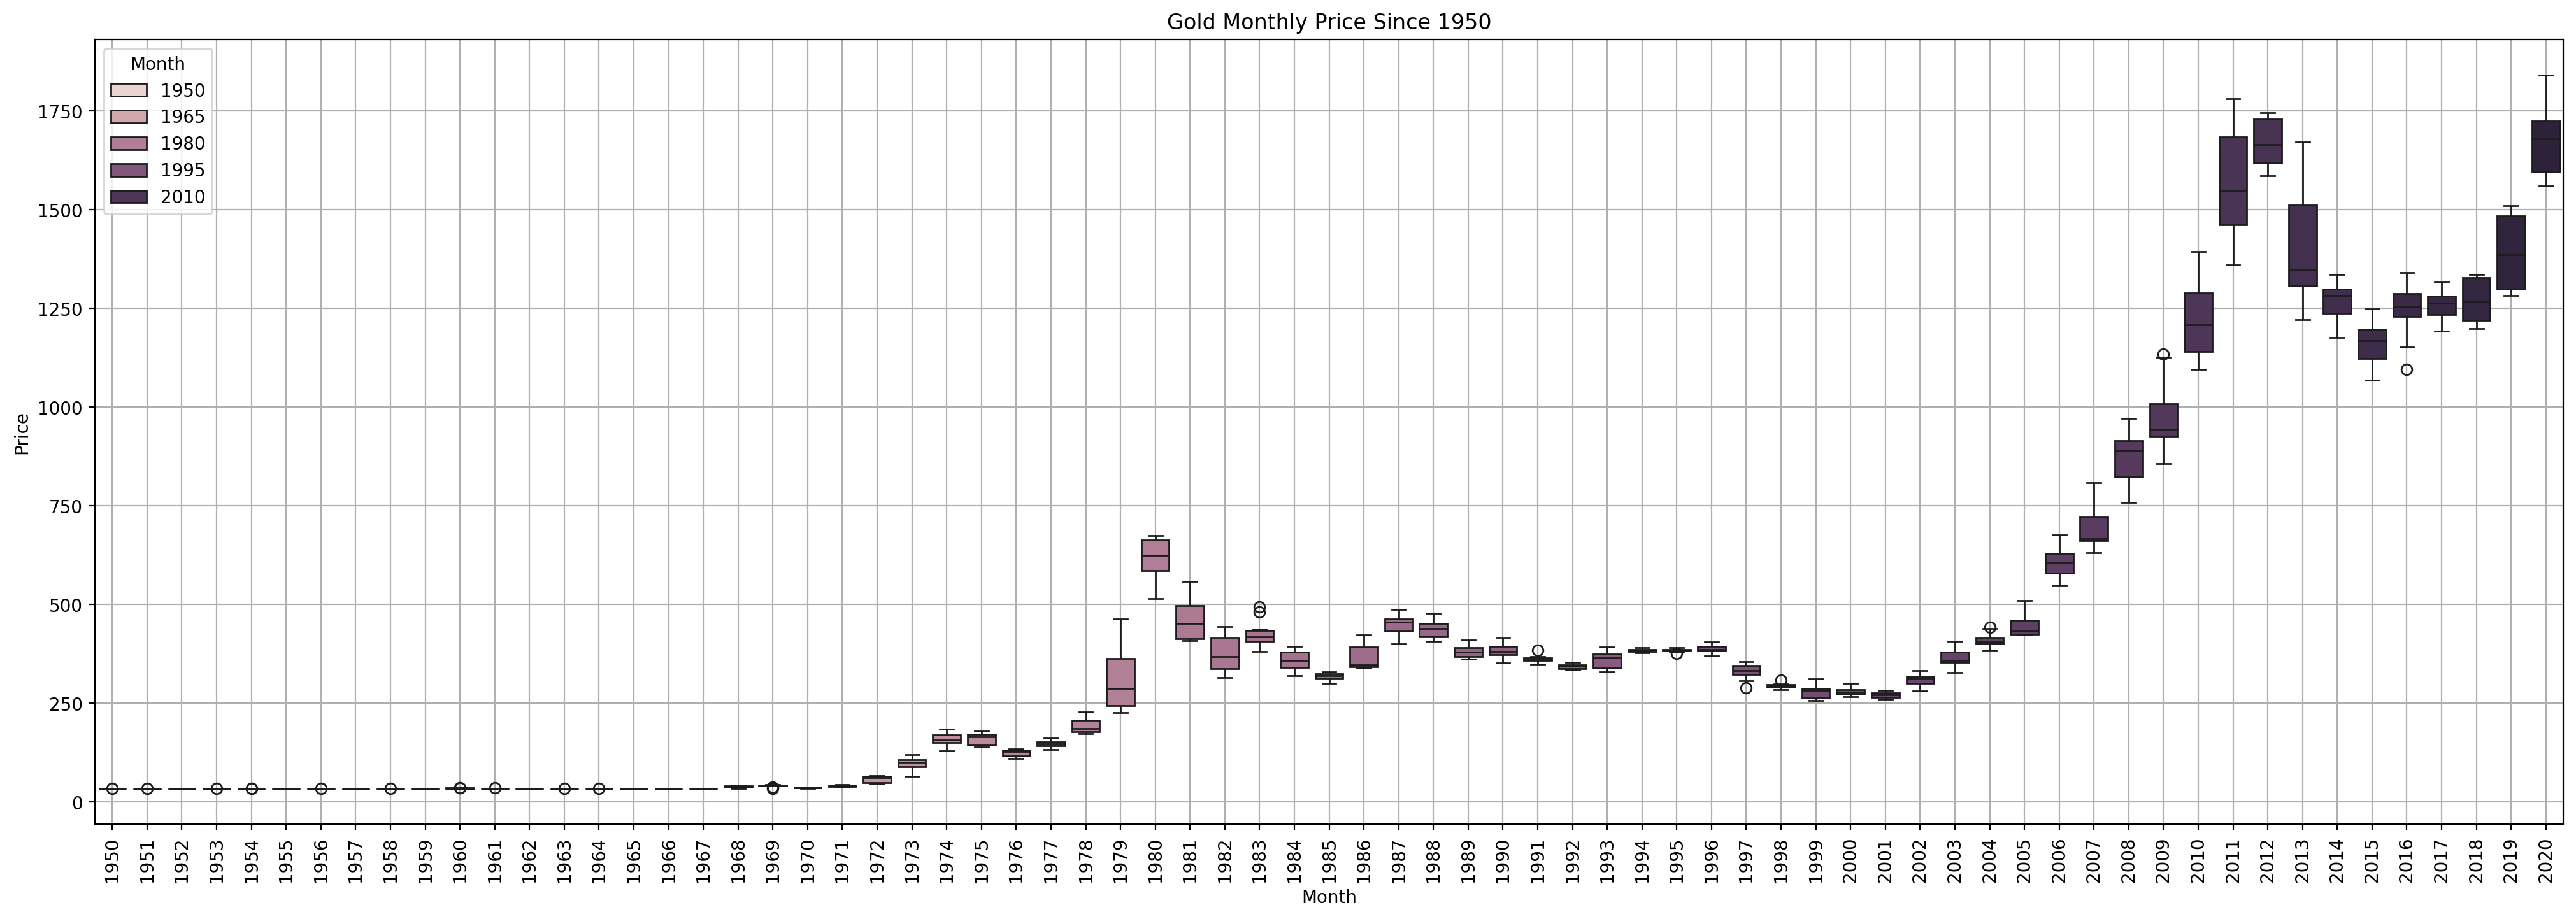

In [16]:
_, ax = plt.subplots(figsize=(25,8),dpi=200)
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax, hue=df.index.year)
plt.title('Gold Monthly Price Since 1950')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()

In [17]:
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [18]:
from statsmodels.graphics.tsaplots import month_plot

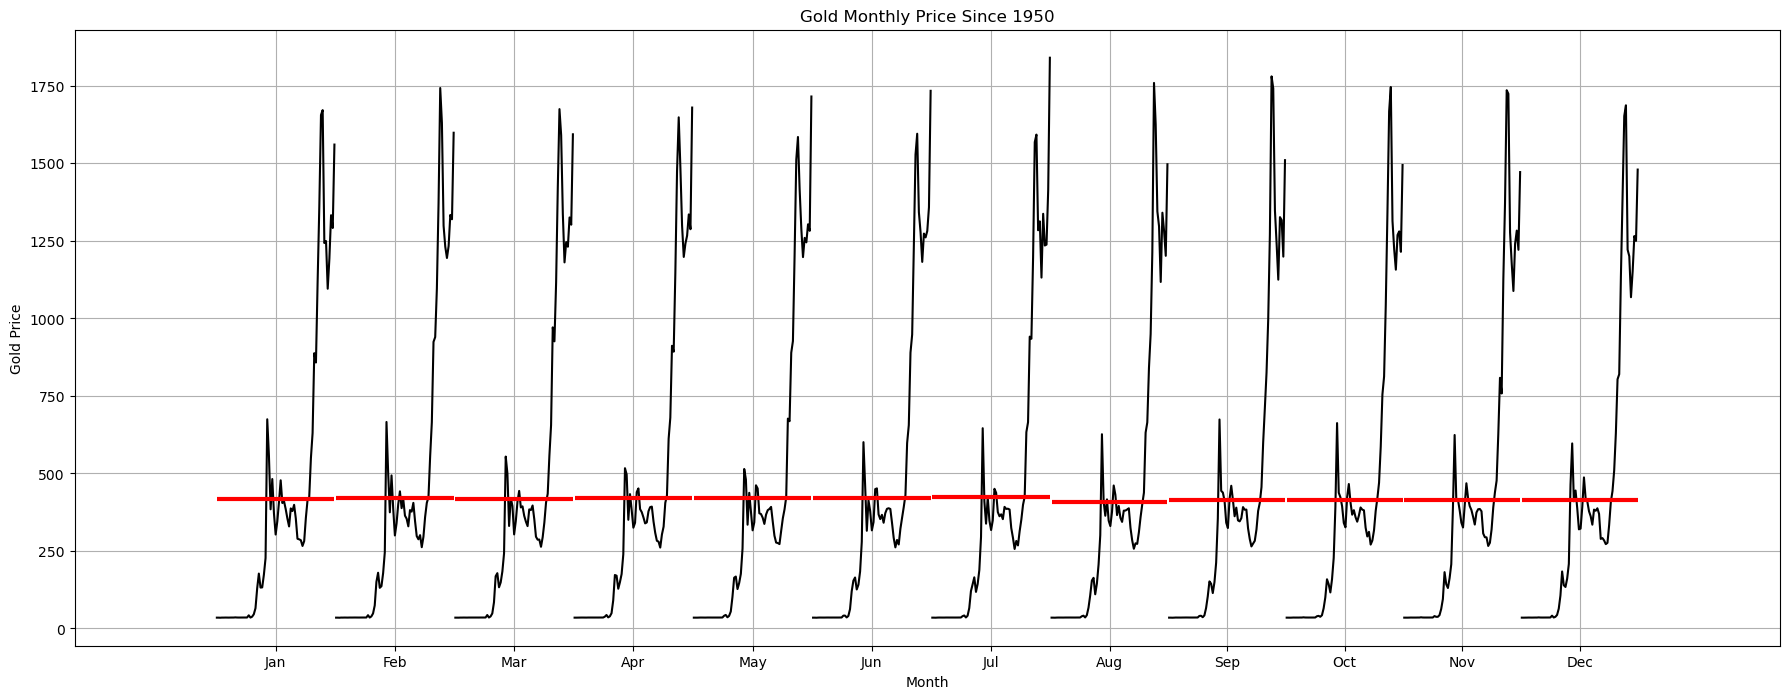

In [19]:
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df,ylabel = 'Price', ax=ax)
plt.title('Gold Monthly Price Since 1950')
plt.xlabel('Month')
plt.ylabel('Gold Price')
plt.grid();

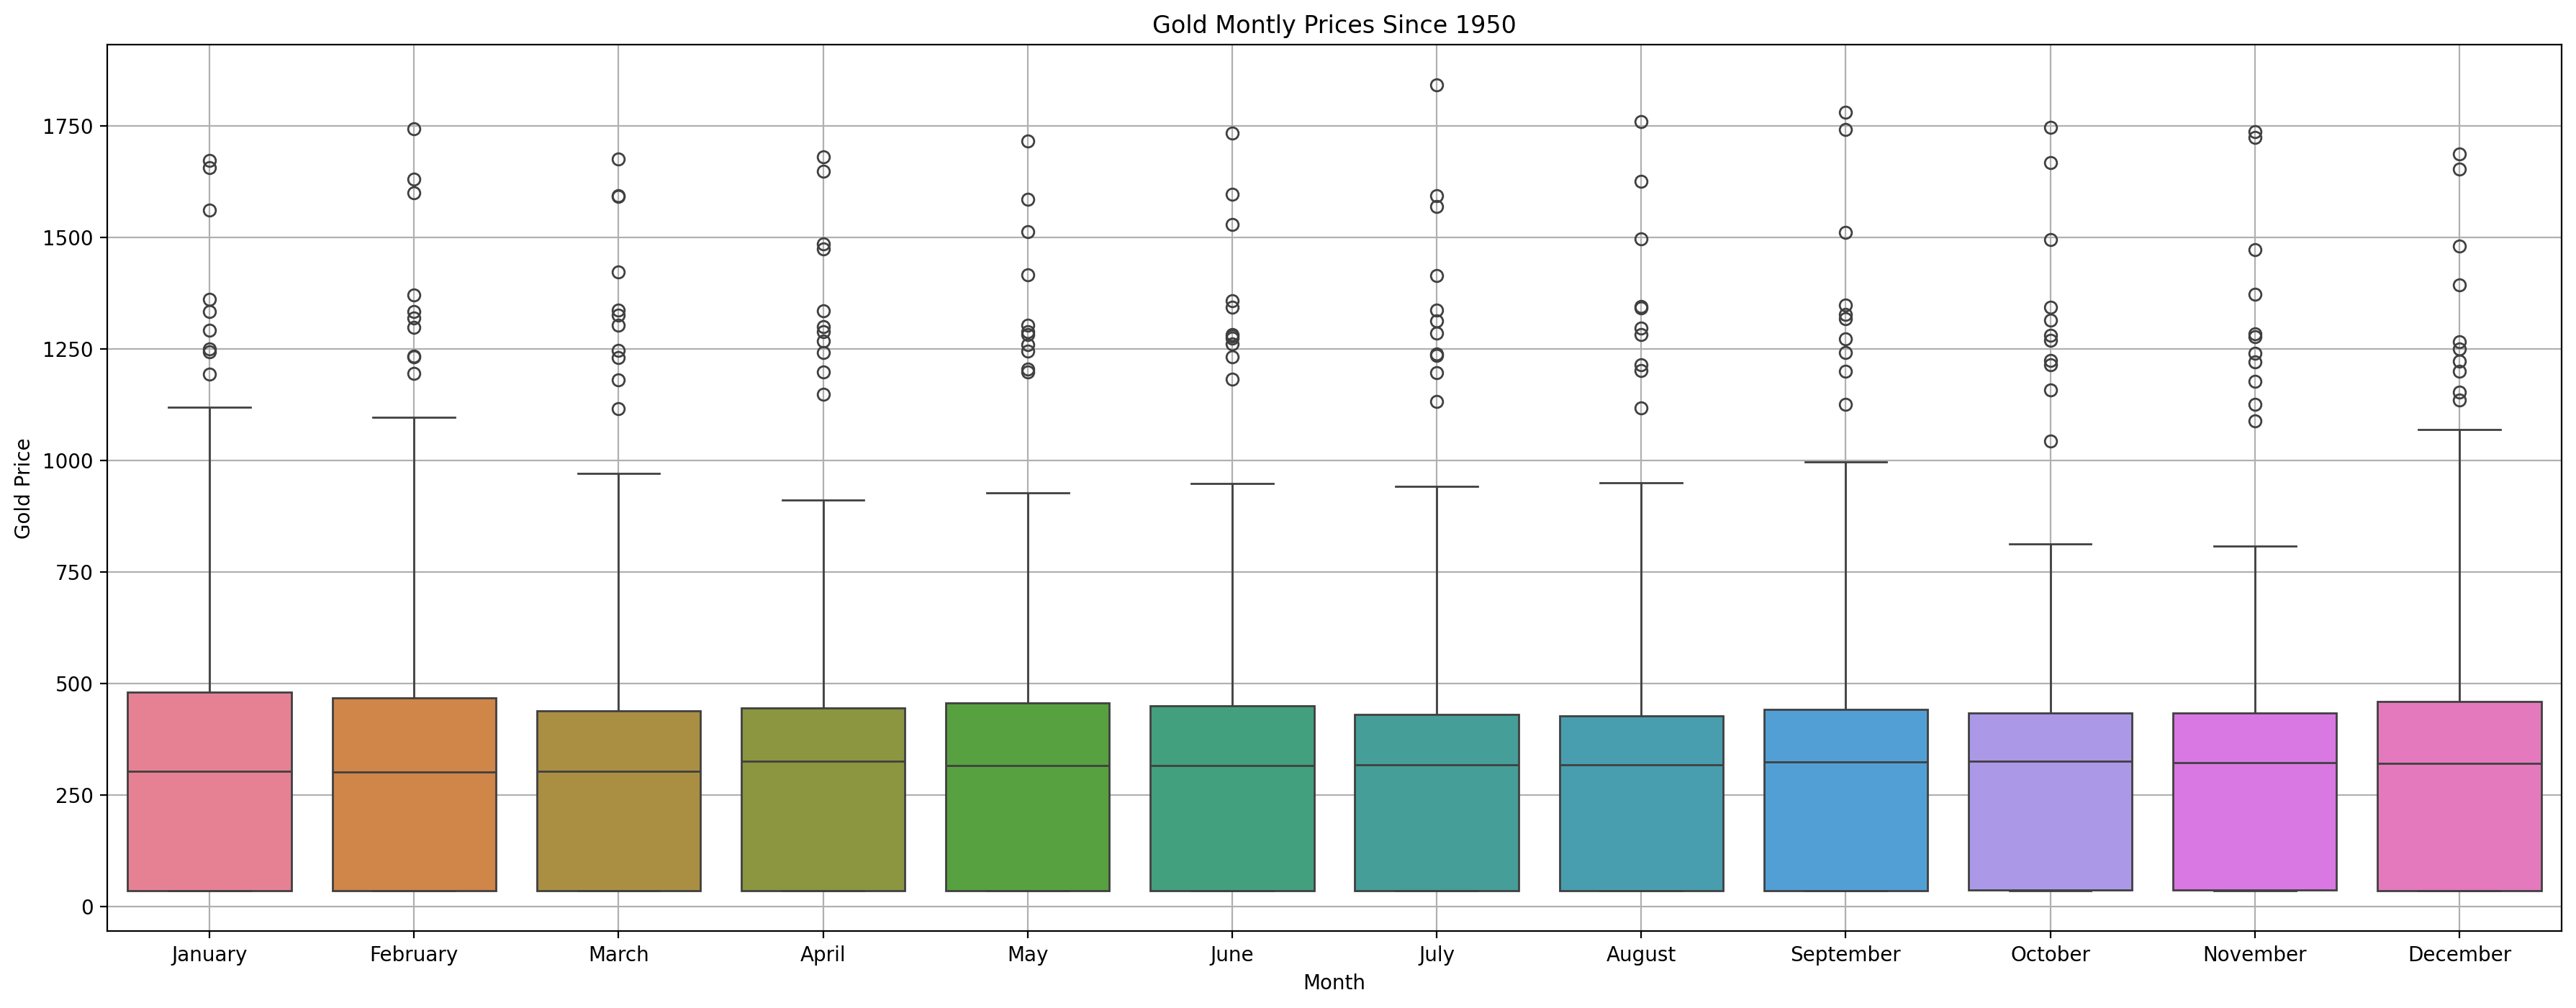

In [20]:
_, ax = plt.subplots(figsize=(22,8),dpi=200)
sns.boxplot(x= df.index.month_name(), y= df.values[:,0],hue=df.index.month_name(),
            ax=ax)
plt.title('Gold Montly Prices Since 1950')
plt.xlabel('Month')
plt.ylabel('Gold Price')
plt.grid()
plt.show();

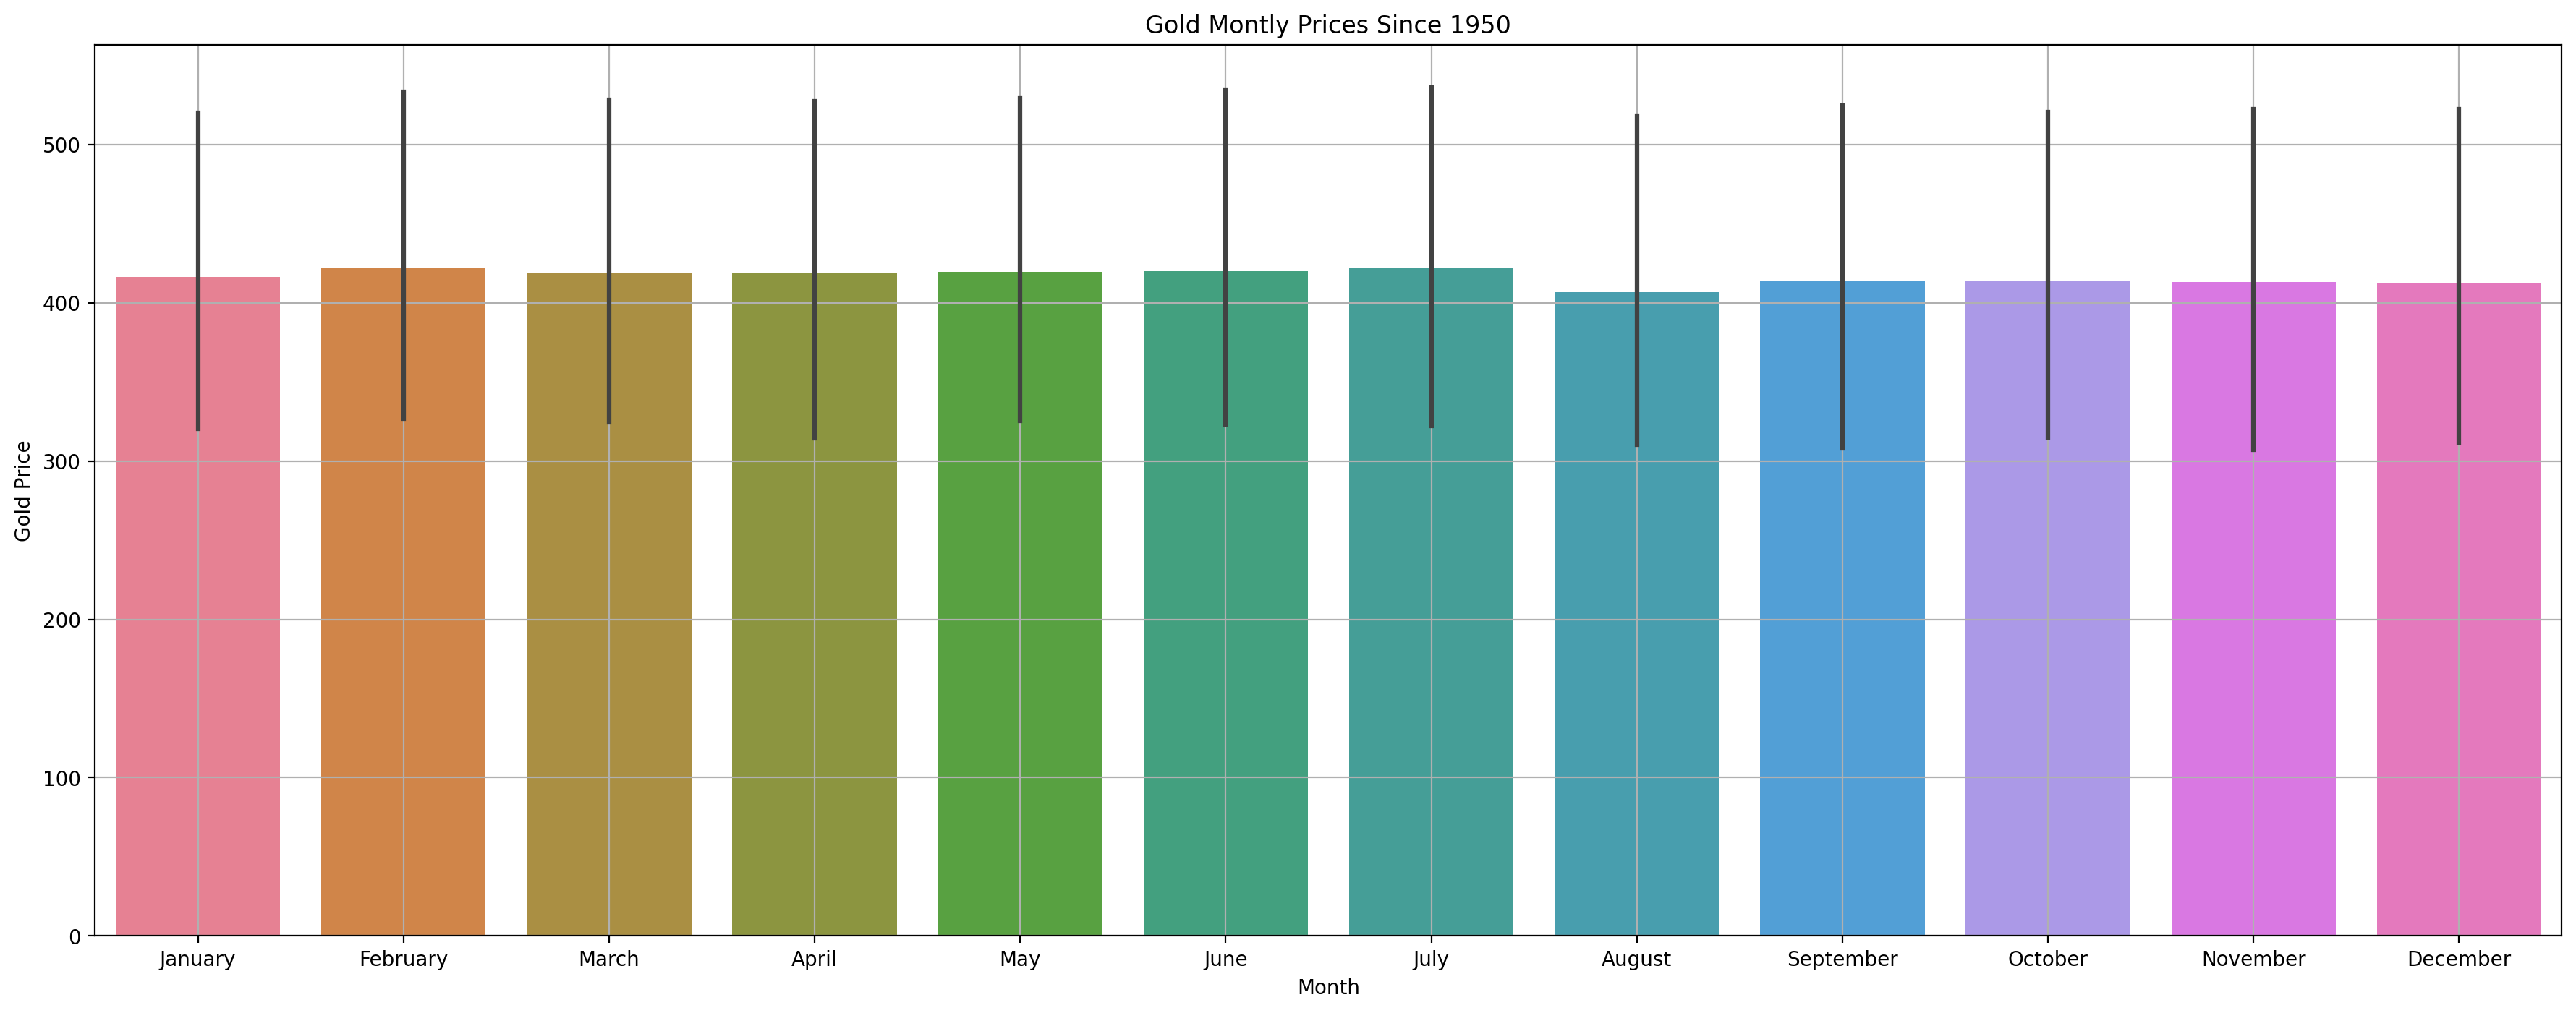

In [21]:
_, ax = plt.subplots(figsize=(22,8),dpi=200)
sns.barplot(x= df.index.month_name(), y= df.values[:,0],hue=df.index.month_name(),
            ax=ax)
plt.title('Gold Montly Prices Since 1950')
plt.xlabel('Month')
plt.ylabel('Gold Price')
plt.grid()
plt.show();

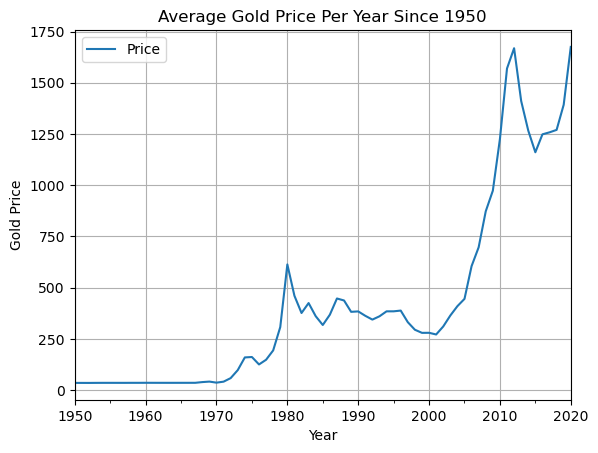

In [22]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title('Average Gold Price Per Year Since 1950')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.grid();

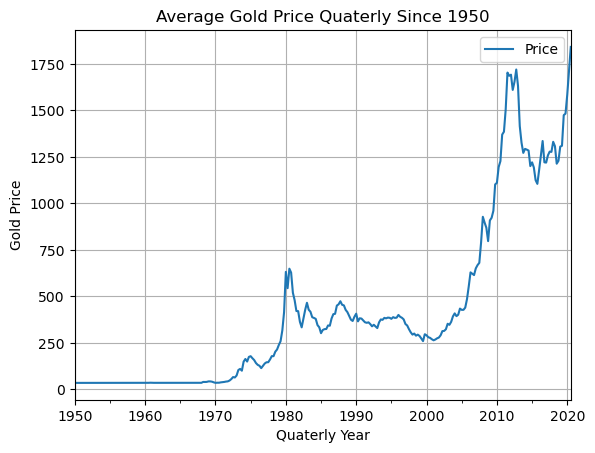

In [23]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title('Average Gold Price Quaterly Since 1950')
plt.xlabel('Quaterly Year')
plt.ylabel('Gold Price')
plt.grid()
plt.show();

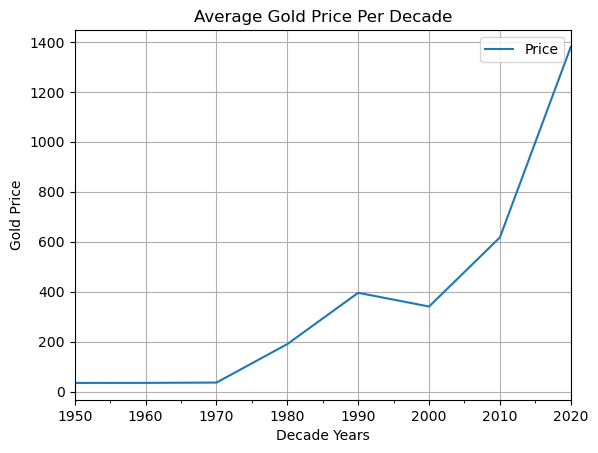

In [24]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('Average Gold Price Per Decade')
plt.xlabel('Decade Years')
plt.ylabel('Gold Price')
plt.grid()
plt.show();

In [25]:
df_1 = df.groupby(df.index.year).mean().rename(columns= {'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index= True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
Month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


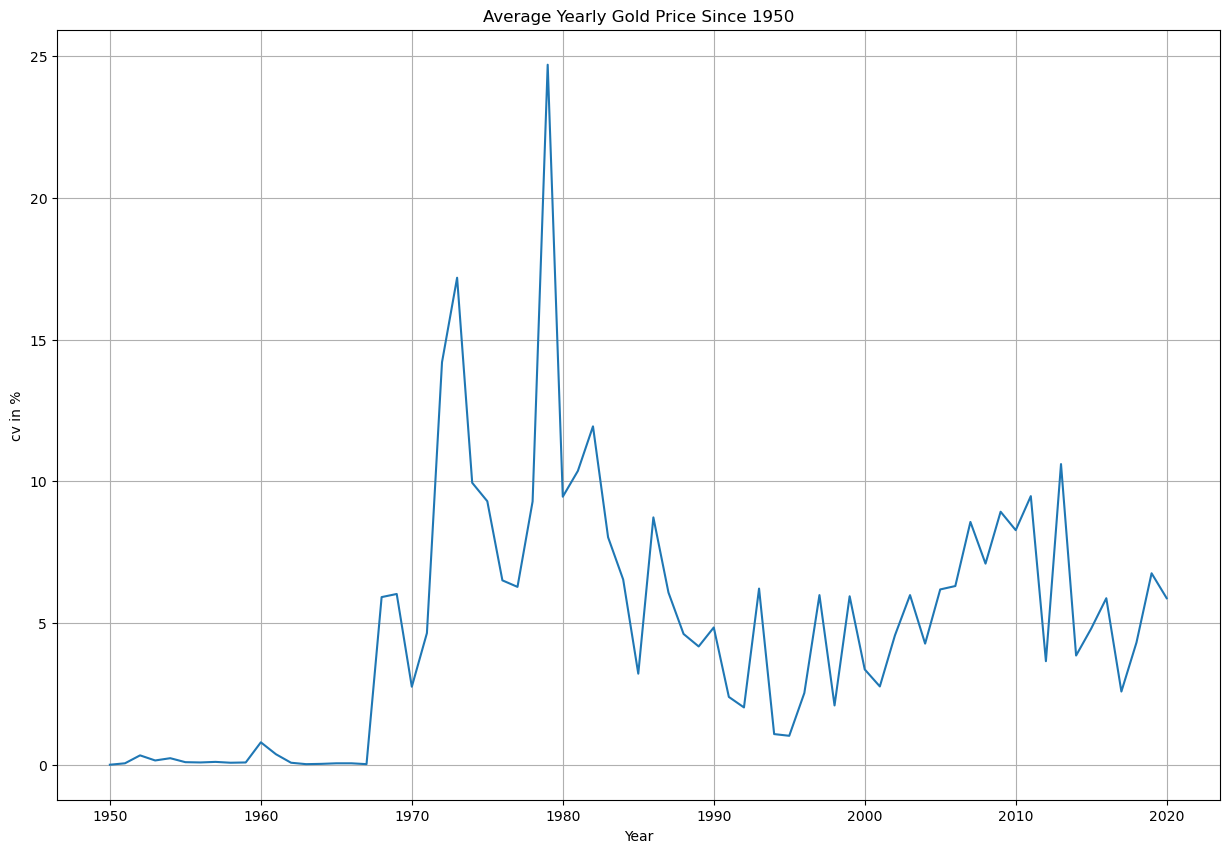

In [26]:
fig, ax= plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();
plt.title('Average Yearly Gold Price Since 1950')
plt.xlabel('Year')
plt.ylabel('cv in %')
plt.grid()
plt.show();

## MACHINE LEARNING

#### TRAIN TEST SPLIT

In [29]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [30]:
print(train.shape)

(792, 1)


In [31]:
print(test.shape)

(55, 1)


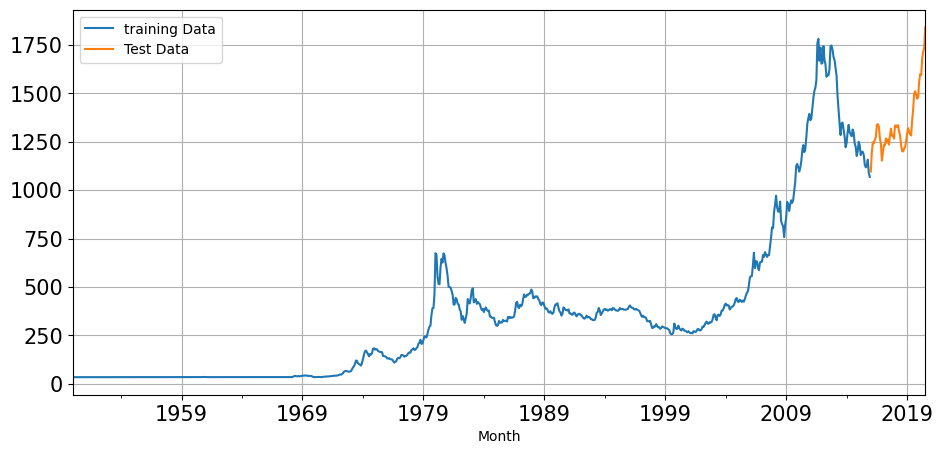

In [32]:
train['Price'].plot(figsize=(11,5), fontsize=15)
test['Price'].plot(figsize=(11,5),fontsize=15)
plt.grid()
plt.legend(['training Data', 'Test Data'])
plt.show();


In [33]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [34]:
LR_train = train.copy()
LR_test = test.copy()

In [35]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [36]:
Lr = LinearRegression()

In [37]:
Lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

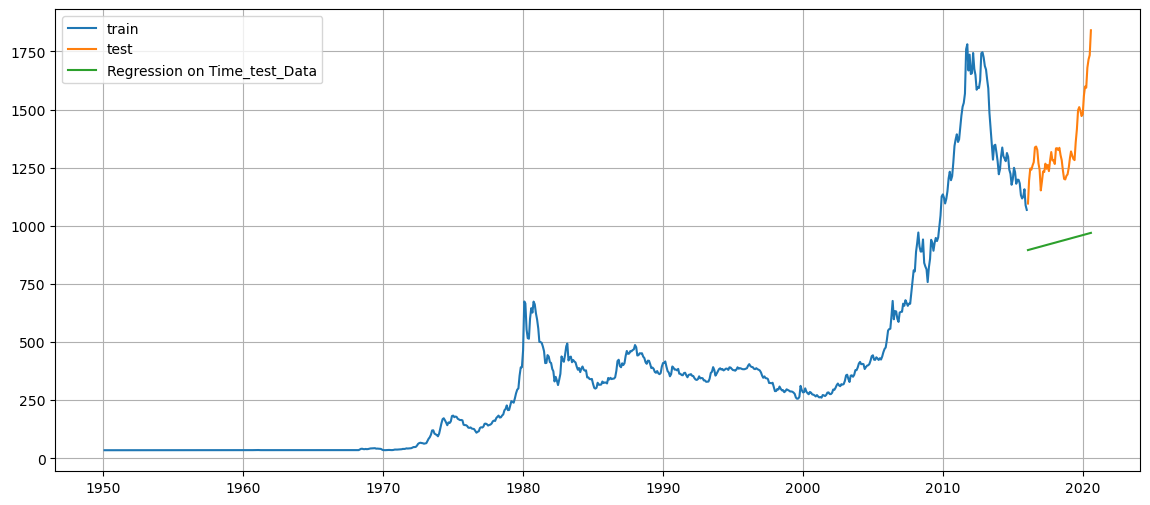

In [38]:
test_predict_model_1 = Lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predict_model_1

plt.figure(figsize=(14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'], label = 'Regression on Time_test_Data')
plt.legend(loc = 'best')
plt.grid();

### Prediction Accuracy for the Forecast Statistical model

In [97]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/ actual))*100, 2)

In [99]:
mape_model1_test = mape(test['Price'].values,test_predict_model_1)
print('MAPE is %3.3f'%(mape_model1_test),'%')

MAPE is 29.760 %


In [106]:
results = pd.DataFrame({'Test Mape (%)':[mape_model1_test]}, index=['RegressionOnTime'])

In [108]:
results

,Test Mape (%)
RegressionOnTime,29.76


In [112]:
final_model = ExponentialSmoothing(df,
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)

In [116]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('MAPE:', Mape_final_model)

MAPE: 17.24


In [118]:
predictions  = final_model.forecast(steps=len(test))

In [138]:
pred_df = pd.DataFrame({'lower_CI':predictions - 1.96*np.std(final_model.resid, ddof=1),
                      'prediction':predictions,
                      'upper_CI': predictions+ 1.96*np.std(final_model.resid, ddof = 1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


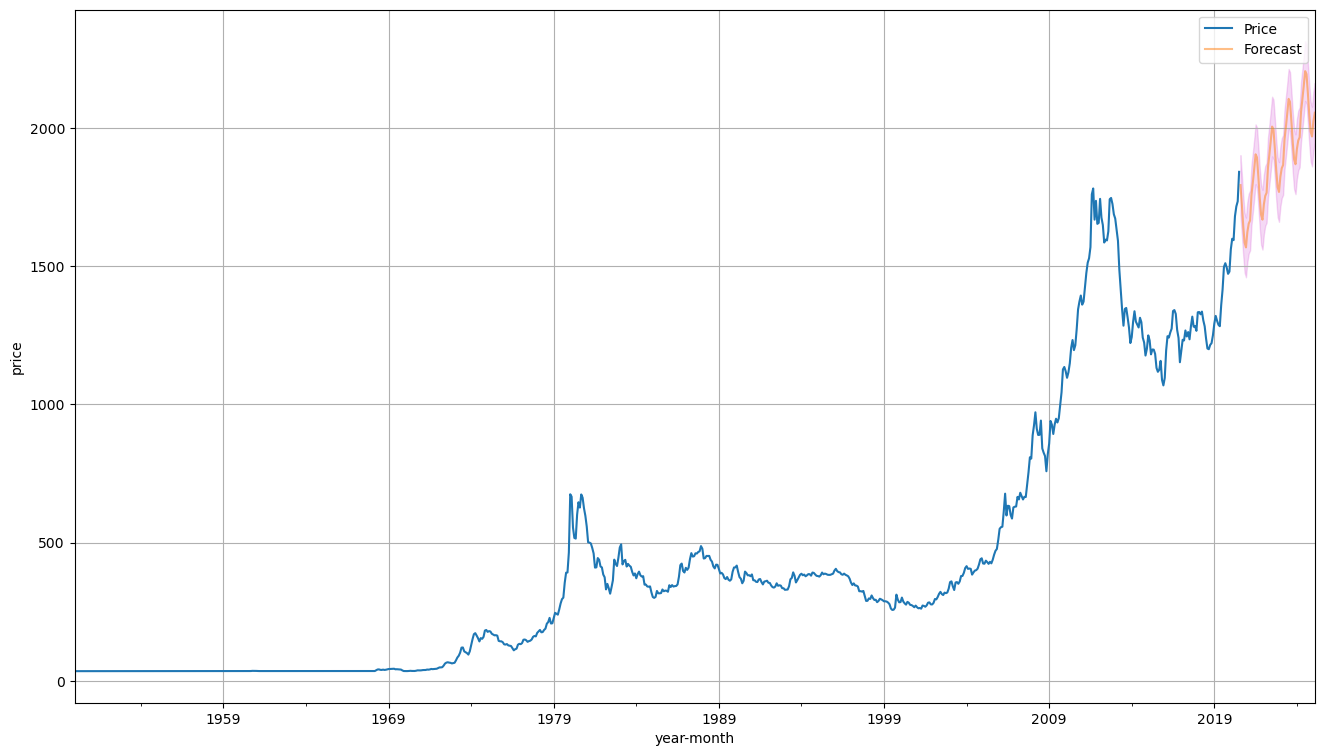

In [150]:
axis = df.plot(label = 'Actual', figsize=(16,9))
pred_df['prediction'].plot(ax = axis, label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'],color = 'm',alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()